# Projekt Adult Census Income

### Projekt, którego celem predykcyjnym jest stwierdzenie, czy dana osoba zarobi ponad 50K USD rocznie. 

- Typ problemu: klasyfikacja binarna 1-zarobi 0-nie zarobi
- Metryka sukcesu: accuracy
$$ \frac{wszystkie\ poprawne\ odpowiedzi}{wszystkie\ odpowiedzi}$$

## 1. Import bibliotek

In [57]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder, MinMaxScaler



from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

#models
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 2. Wczytanie danych

#### Oficjalny opis danych

- **age** – Wiek osoby.
- **workclass** – Rodzaj pracodawcy, jaki ma dana osoba. Niezależnie od tego, czy są to instytucje rządowe, wojskowe, prywatne i inne.
- **fnlwgt** – Pewna liczba (mało istotna jaka). Będziemy ignorować tę zmienną.
- **education** – Najwyższy poziom wykształcenia osiągnięty dla tej osoby.
- **education.num** – Najwyższy poziom wykształcenia w formie liczbowej.
- **marital.status** – Stan cywilny osoby.
- **occupation** – Wykonywany zawód.
- **relationship** – Trochę trudniejsze do wytłumaczenia. Zawiera wartości związane z rodziną, takie jak mąż, ojciec itd.
- **race** – opisy poszczególnych ras człowieka. 
- **sex** – Płeć.
- **capital.gain** – Zyski kapitałowe rejestrowane.
- **capital.loss** – Straty kapitałowe rejestrowane.
- **hours.per.week** – Liczba godzin przepracowane w tygodniu.
- **native.country** – Kraj pochodzenia danej osoby.
- **income** – Zmienna logiczna (mniejsza, równa się lub większa). Niezależnie od tego, czy dana osoba zarabia więcej niż 50 000$ rocznie.

In [58]:
path = 'D:\\PYTHON_PROJ\\ADULT_INCOME\\DATA\\adult.csv'
df = pd.read_csv(path)
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


### 2.1. Charakterystyka danych
- 15 kolumn
- kolumny numeryczne ciągłe: age, capital.gain, capital.losshours.per.week
- kolumny numeryczne kategorialne: fnlwgw, education.num
- kolumny kategorialne: pozostałe

- zmienna docelowa (target variable): income - zmienna kategorialna
- missing values: teoretycznie nie ma

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [60]:
# Dane statystyczne kolumn numerycznych:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


## 3. Preprocessing
### 3.1 Usunięcie kolumny 'fnlwgt' - nieistotna

In [61]:
if 'fnlwgt' in df.columns: del df['fnlwgt']
df.columns

Index(['age', 'workclass', 'education', 'education.num', 'marital.status',
       'occupation', 'relationship', 'race', 'sex', 'capital.gain',
       'capital.loss', 'hours.per.week', 'native.country', 'income'],
      dtype='object')

### 3.2 Zmiana nazw kolumn
- podkreślnik zamiast kropek
- skrócenie wybranych nazw

In [62]:
df = df.rename(columns={'education.num': 'education_num', 'marital.status': 'marital_status','capital.gain':'capital_gain',
                       'capital.loss':'capital_loss', 'hours.per.week':'hours_per_week', 'native.country':'country',
                       'income':'target'})
df.columns

Index(['age', 'workclass', 'education', 'education_num', 'marital_status',
       'occupation', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hours_per_week', 'country', 'target'],
      dtype='object')

### 3.3 Brakujące wartości / Missing values
Wszystkie wiersze wszystkich kolumn są uzupełnione. Nie świadczy to jesnak o tym, że nie ma brakujacych danych. W miejscu missing values pojawia się "?" 

In [63]:
# Zamiana "?" na NaN
df['country'] = df['country'].replace('?',np.nan)
df['workclass'] = df['workclass'].replace('?',np.nan)
df['occupation'] = df['occupation'].replace('?',np.nan)

In [64]:
# Sprawdzenie liczby brakujacych wartości
# df.isnull().sum() 

def check_missing():
    for column in df.columns:
        missing = column, df[column].isnull().sum(), round(100*df[column].isnull().sum()/df.shape[0],1)
        if missing[1] == 0: continue

        print(missing)
  
check_missing()

('workclass', 1836, 5.6)
('occupation', 1843, 5.7)
('country', 583, 1.8)


Najwięcej brakujących danych jest w kolumnie 'occupation' - 5.7%. Jest to na tyle niewielka wartość, że nie należy usuwać tej cechy. Podobnie z kolumnami 'workclass' i 'country'. Brakujące wartości uzupełniamy -1.

In [65]:
df =  df.fillna(-1)
check_missing()

### 3.4 Faktoryzacja zmiennej docelowej

In [66]:
df['target'] = (df['target'] != '<=50K').astype('int8')

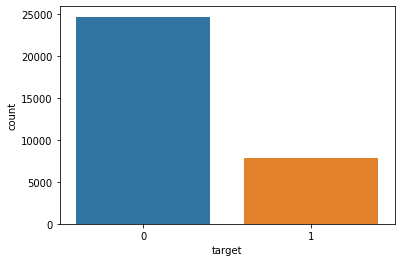

In [67]:
sns.countplot(df['target']);

Rozkład danych w zmiennej docelowej jest dość nierównomierny: 68% - 32%

## 4. Budowa i sprawdzenie prostego modelu 
### 4.1 DummyClassifier

In [68]:
X = df[ ['age'] ].values # model będzie trenowany tylko w oparciu o zmienną "age"
y = df[ 'target' ].values

# Podział danych na zbiór train i test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print("Train:", X_train.shape, y_train.shape)
print("Test:", X_test.shape, y_test.shape)

Train: (22792, 1) (22792,)
Test: (9769, 1) (9769,)


In [69]:
model = DummyClassifier(random_state=2019)
model.fit(X_train, y_train)    # trenowanie modelu
y_pred = model.predict(X_test) # predykcja

print('accuracy:',round(accuracy_score(y_test, y_pred),4)) # wyznaczenie błędu na podstawie y_test i y_pred

accuracy: 0.631


### 4.2 LogisticRegression

In [70]:
model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)    
y_pred = model.predict(X_test) 

print('accuracy:',round(accuracy_score(y_test, y_pred),4))

accuracy: 0.7457


## 5. Feature engineering
### 5.1 Faktoryzacja i grupowanie cech kategorialnych

In [71]:
# Przegląd kolumn kategorialnych
for col in df.select_dtypes(include=[np.object]).columns:
    print(f"--------------------{col.title()}-------------------------")
    total= df[col].value_counts()
    percent = df[col].value_counts() / df.shape[0]
    df_cat = pd.concat([total,percent],keys = ['total','percent'],axis = 1)
    print(df_cat)
    print('\n')

--------------------Workclass-------------------------
                  total   percent
Private           22696  0.697030
Self-emp-not-inc   2541  0.078038
Local-gov          2093  0.064279
-1                 1836  0.056386
State-gov          1298  0.039864
Self-emp-inc       1116  0.034274
Federal-gov         960  0.029483
Without-pay          14  0.000430
Never-worked          7  0.000215


--------------------Education-------------------------
              total   percent
HS-grad       10501  0.322502
Some-college   7291  0.223918
Bachelors      5355  0.164461
Masters        1723  0.052916
Assoc-voc      1382  0.042443
11th           1175  0.036086
Assoc-acdm     1067  0.032769
10th            933  0.028654
7th-8th         646  0.019840
Prof-school     576  0.017690
9th             514  0.015786
12th            433  0.013298
Doctorate       413  0.012684
5th-6th         333  0.010227
1st-4th         168  0.005160
Preschool        51  0.001566


--------------------Marital_Status--

Funkcja plotująca:

In [72]:
def plotting_groups(df,feat):
    fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
    df[feat].value_counts().plot(kind='bar', ax=ax1);
    df['{0}_groups'.format(feat)].value_counts().plot(kind='bar', ax=ax2);
    fig.suptitle(feat);

### - workclass
Pogrupowanie danych: 
- self_emp, 
- gov, 
- no_pay, 
- priv

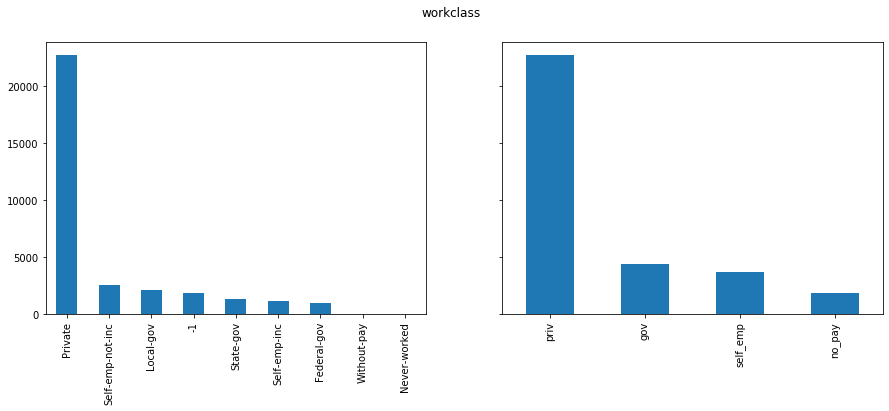

In [73]:
def workclass_grouping(df):
    if df['workclass'] == 'Federal-gov' or df['workclass']== 'Local-gov' or df['workclass']=='State-gov': return 'gov'
    elif df['workclass'] == 'Private':return 'priv'
    elif df['workclass'] == 'Self-emp-inc' or df['workclass'] == 'Self-emp-not-inc': return 'self_emp'
    else: return 'no_pay'

df['workclass_cat']=pd.factorize(df['workclass'])[0]
df['workclass_groups']=df.apply(workclass_grouping, axis=1)
df['workclass_groups_cat']=pd.factorize(df['workclass_groups'])[0]

# Porównanie histogramów:
plotting_groups(df,'workclass')

### - education
Pogrupowanie danych: 
- ed_0, 
- ed_1, 
- ed_2, 
- ed_3

In [74]:
# Funkcja grupująca przez słownik:
def replace_by_group(df, dictionary, col, new_name):
    df[new_name]=df[col].copy()
    for key in dictionary.keys():
          df[new_name].replace(to_replace=dictionary[key], value=str(key), inplace=True)
    return df

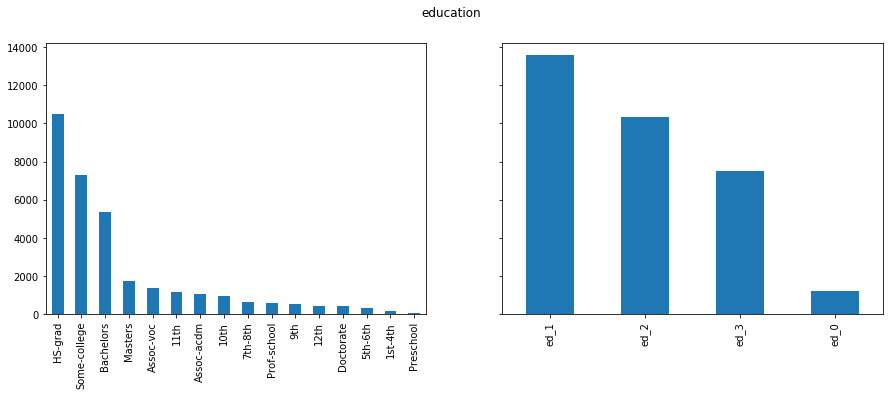

In [75]:
# Grupowanie przez słownik:
education_dict={
    'ed_0': ['1st-4th','5th-6th','7th-8th','Preschool'],
    'ed_1': ['9th','10th','11th','12th','HS-grad'],
    'ed_2': ['Prof-school','Some-college','Assoc-acdm', 'Assoc-voc'],
    'ed_3': ['Bachelors','Masters','Doctorate']
}
df['education_cat'] = pd.factorize(df['education'])[0]
df = replace_by_group(df, education_dict, 'education', 'education_groups' )
df['education_groups_cat'] = pd.factorize(df['education_groups'])[0]

# Porównanie histogramów:
plotting_groups(df,'education')

### - marital_status
Pogrupowanie danych: 
- single
- couple

single    17144
couple    15417
Name: marital_status_groups, dtype: int64

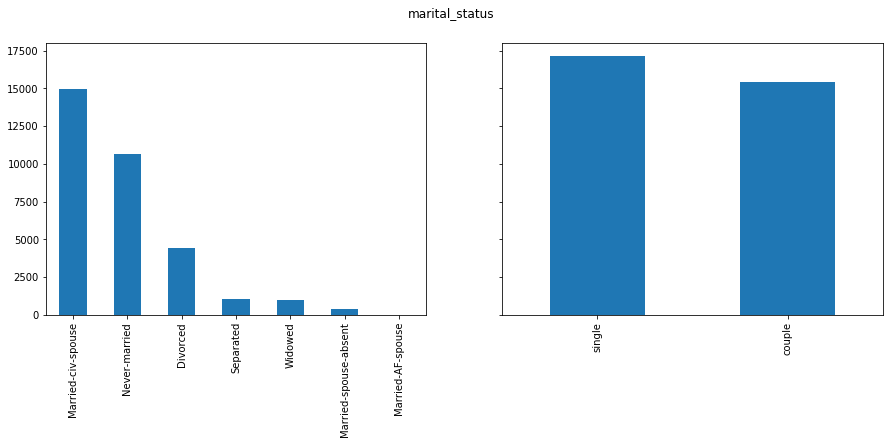

In [76]:
marital_dict={
    'single': ['Widowed','Divorced','Separated','Never-married'],
    'couple': ['Married-civ-spouse','Married-AF-spouse','Married-spouse-absent']}

df['marital_status_cat'] = pd.factorize(df['marital_status'])[0]
df = replace_by_group(df, marital_dict, 'marital_status', 'marital_status_groups' )
df['marital_status_groups_cat'] = pd.factorize(df['marital_status_groups'])[0]

# Porównanie histogramów:
plotting_groups(df,'marital_status')

df['marital_status_groups'].value_counts()

### - relationship
Pogrupowanie danych: 
- single
- couple

single    17800
couple    14761
Name: relationship_groups, dtype: int64

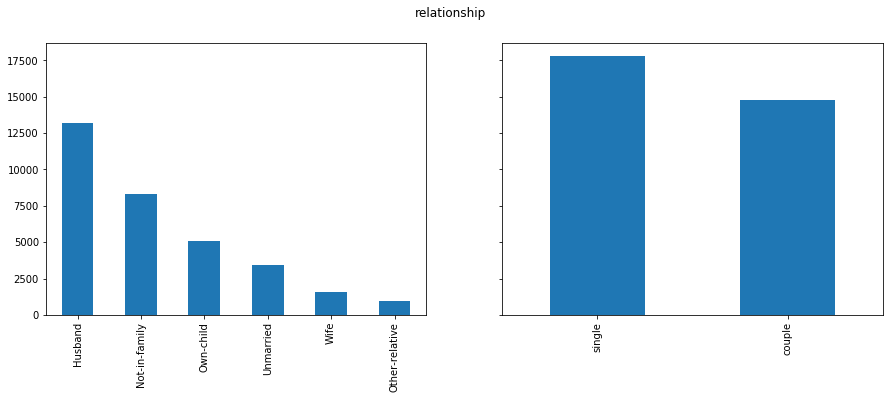

In [77]:
relationship_dict={
    'single': ['Not-in-family','Unmarried','Other-relative','Own-child'],
    'couple': ['Husband','Wife','Married-spouse-absent']}

df['relationship_cat'] = pd.factorize(df['relationship'])[0]
df = replace_by_group(df, relationship_dict, 'relationship', 'relationship_groups' )
df['relationship_groups_cat'] = pd.factorize(df['relationship_groups'])[0]

# Porównanie histogramów:
plotting_groups(df,'relationship')

df['relationship_groups'].value_counts()

Zasadniczo kolumny 'marital_status_groups' i 'relationship_groups' są niemalże identyczne.
Jedną z nich można wyeliminować. Zostawiamy marital_status

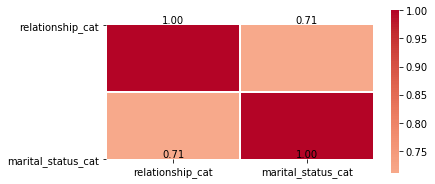

In [78]:
plt.rcParams['figure.figsize']=(6,3)
g = sns.heatmap(df[['relationship_cat', 'marital_status_cat']].corr(), annot=True, linewidths=.5, center=0.5, fmt = ".2f", cmap = "coolwarm",
               annot_kws={"size": 10, "color":'black', 'ha': 'center','va': 'bottom'}, square=True)
plt.yticks(rotation = 0 )
plt.show()

In [79]:
# Usunięcie kolumn związanych z 'relationship'
for feat in ['relationship','relationship_cat','relationship_groups', 'relationship_groups_cat']:
    if feat in df:
        del df[feat]
df.columns

Index(['age', 'workclass', 'education', 'education_num', 'marital_status',
       'occupation', 'race', 'sex', 'capital_gain', 'capital_loss',
       'hours_per_week', 'country', 'target', 'workclass_cat',
       'workclass_groups', 'workclass_groups_cat', 'education_cat',
       'education_groups', 'education_groups_cat', 'marital_status_cat',
       'marital_status_groups', 'marital_status_groups_cat'],
      dtype='object')

### - occupation
Pogrupowanie danych: 
- high
- mid_high
- mid_low
- low

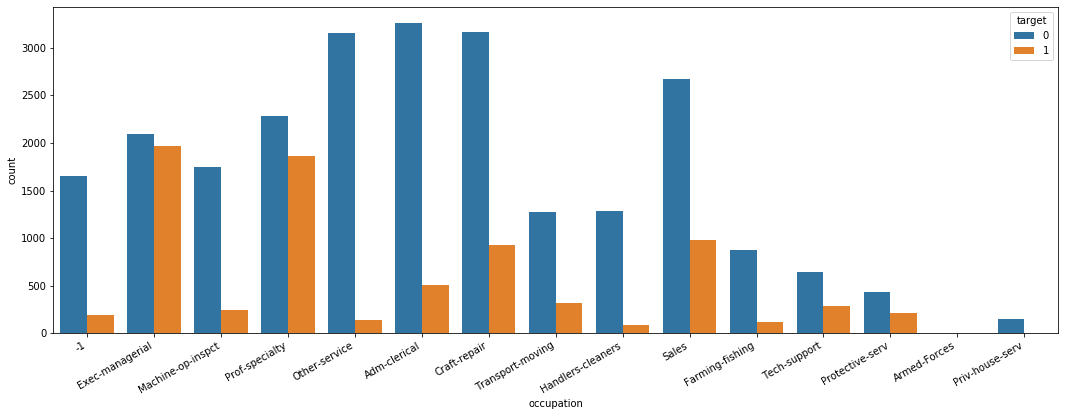

In [80]:
plt.figure(figsize=(18, 6))
ro = sns.countplot(df['occupation'], hue=df['target'])
ro.set_xticklabels(ro.get_xticklabels(), rotation=30, ha="right")
plt.show()

In [81]:
pd.crosstab(df['target'],df['occupation']).apply(lambda row: row/row.sum(), axis=0)

occupation,-1,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
target,,,,,,,,,,,,,,,
0,0.896365,0.865517,0.888889,0.773359,0.515986,0.884306,0.937226,0.875125,0.958422,0.993289,0.550966,0.674884,0.730685,0.695043,0.799624
1,0.103635,0.134483,0.111111,0.226641,0.484014,0.115694,0.062774,0.124875,0.041578,0.006711,0.449034,0.325116,0.269315,0.304957,0.200376


mid_low     12462
high         8206
mid_high     5227
low          4823
-1           1843
Name: occupation_groups, dtype: int64

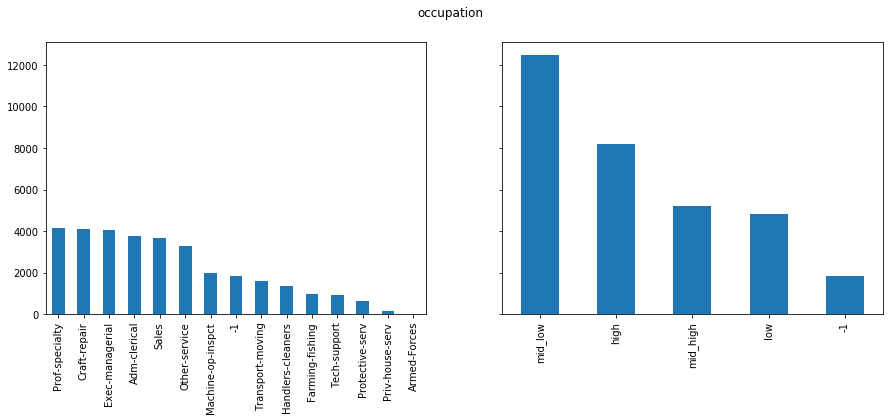

In [82]:
occupation_dict={
    'high': ['Prof-specialty','Exec-managerial'],
    'mid_high': ['Protective-serv','Tech-support','Sales'],
    'mid_low': ['Craft-repair','Transport-moving','Adm-clerical','Machine-op-inspct','Farming-fishing'],
    'low': ['Armed-Forces','-1','Handlers-cleaners','Handlers-cleaners','Other-service','Priv-house-serv']}

df['occupation_cat'] = pd.factorize(df['occupation'])[0]
df = replace_by_group(df, occupation_dict, 'occupation', 'occupation_groups' )
df['occupation_groups_cat'] = pd.factorize(df['occupation_groups'])[0]

# Porównanie histogramów:
plotting_groups(df,'occupation')

df['occupation_groups'].value_counts()

### - country

In [83]:
df['country'].unique()

array(['United-States', -1, 'Mexico', 'Greece', 'Vietnam', 'China',
       'Taiwan', 'India', 'Philippines', 'Trinadad&Tobago', 'Canada',
       'South', 'Holand-Netherlands', 'Puerto-Rico', 'Poland', 'Iran',
       'England', 'Germany', 'Italy', 'Japan', 'Hong', 'Honduras', 'Cuba',
       'Ireland', 'Cambodia', 'Peru', 'Nicaragua', 'Dominican-Republic',
       'Haiti', 'El-Salvador', 'Hungary', 'Columbia', 'Guatemala',
       'Jamaica', 'Ecuador', 'France', 'Yugoslavia', 'Scotland',
       'Portugal', 'Laos', 'Thailand', 'Outlying-US(Guam-USVI-etc)'],
      dtype=object)

north_america    29291
latino            1200
asia               671
-1                 583
europe             521
south_america      201
other               94
Name: country_groups, dtype: int64

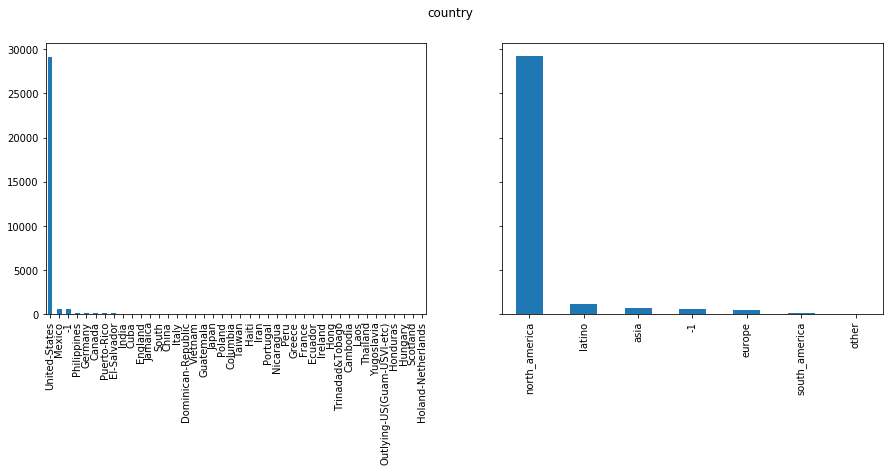

In [84]:
country_dict={
    'north_america': ['United-States','Canada'],
    'latino': ['Mexico','Puerto-Rico','El-Salvador','Jamaica','Haiti','Nicaragua','Dominican-Republic','Honduras', 'Cuba'],
    'south_america': ['Trinadad&Tobago','Ecuador','Columbia', 'Guatemala','Peru'],
    'europe': ['Greece','Holand-Netherlands','Poland','England', 'Germany', 'Italy','Ireland','Hungary','France', 
          'Yugoslavia', 'Scotland','Portugal'],
    'asia': ['Vietnam', 'China','Taiwan','India','Philippines','Japan', 'Hong','Cambodia','Thailand','Laos','Iran'],
    'other': ['South','Outlying-US(Guam-USVI-etc)']}

df = replace_by_group(df, country_dict, 'country', 'country_groups' )
df['country_groups_cat'] = pd.factorize(df['country_groups'])[0]

# Porównanie histogramów:
plotting_groups(df,'country')

df['country_groups'].value_counts()

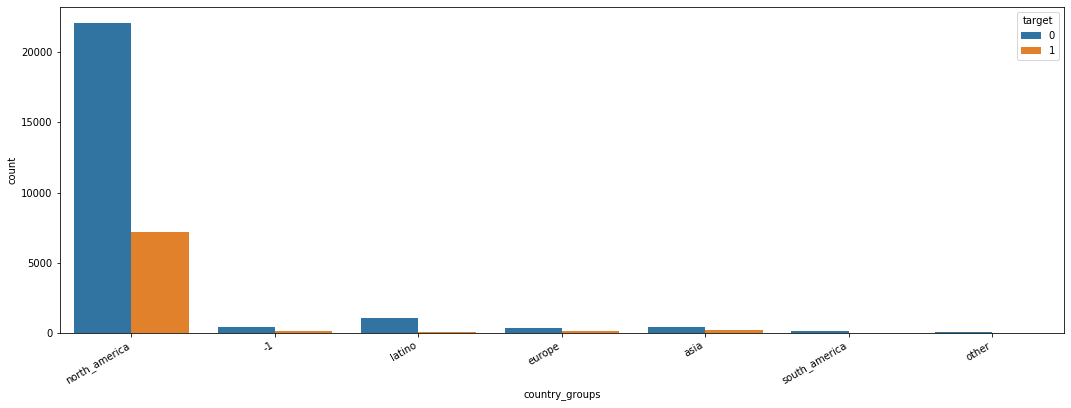

In [85]:
plt.figure(figsize=(18, 6))
ro = sns.countplot(df['country_groups'], hue=df['target'])
ro.set_xticklabels(ro.get_xticklabels(), rotation=30, ha="right")
plt.show()

### 5.2 Analiza zmiennych numerycznych ciągłych

In [86]:
def plotting_histograms(df,feat_list):
    fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(15, 5),subplot_kw={"ylim":(0,1000)})
    df[feat_list[0]].plot(kind='hist', bins=100, ax=ax1);
    ax1.set_title(feat_list[0])
    df[feat_list[1]].plot(kind='hist', bins=100,ax=ax2);
    ax2.set_title(feat_list[1])

In [87]:
skewed_data = ['capital_gain','capital_loss']

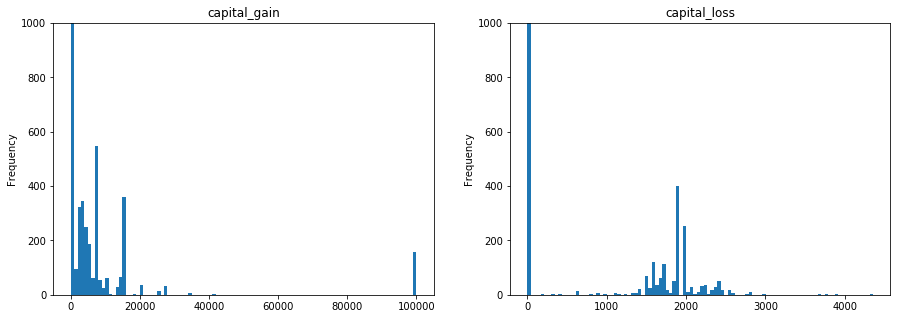

In [88]:
plotting_histograms(df, skewed_data)

Rozkłady danych są dość mocno zniekształcone. Dlatego logarytmujemy zmienne.

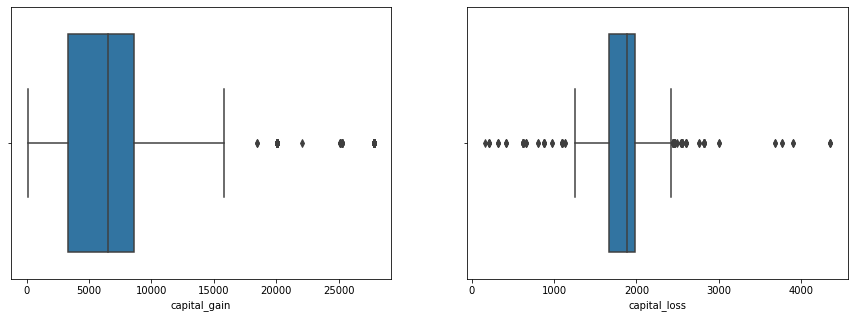

In [89]:
df=df[df['capital_gain']<30000]
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(x=df[df[skewed_data[0]]>0][skewed_data[0]], ax=ax1); # usuwamy wiersze z wartościami pow.20K
sns.boxplot(x=df[df[skewed_data[1]]>0][skewed_data[1]], ax=ax2);

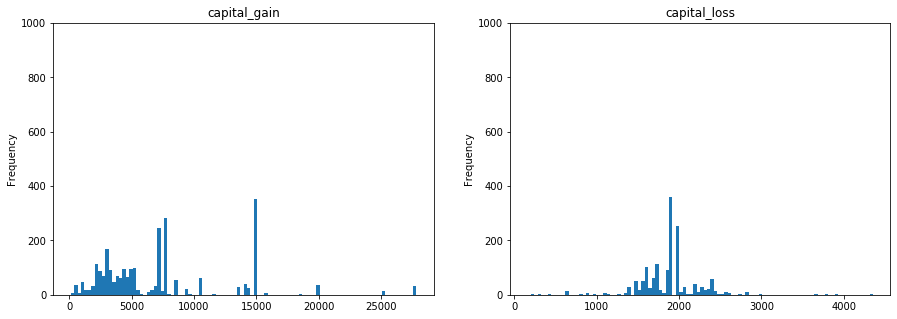

In [90]:
capital_gain_df=df[df['capital_gain']>0]
capital_loss_df=df[df['capital_loss']>0]

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(15, 5),subplot_kw={"ylim":(0,1000)})

df[df[skewed_data[0]]>0][skewed_data[0]].plot(kind='hist', bins=100, ax=ax1);
ax1.set_title(skewed_data[0]);

df[df[skewed_data[1]]>0][skewed_data[1]].plot(kind='hist', bins=100,ax=ax2);
ax2.set_title(skewed_data[1]);

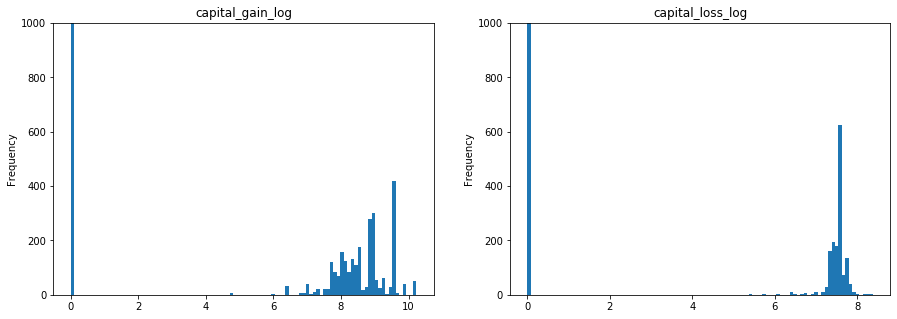

In [91]:
skewed_data_log=[]

for feat in skewed_data:
    df['{0}_log'.format(feat)] = df[feat].map(lambda x: np.log(x+1))
    skewed_data_log.append(str('{0}_log'.format(feat)))

plotting_histograms(df, skewed_data_log)

In [92]:
# plotting def
def plotting_hist_box(df, feat):
    fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(15, 5))
    df[feat].plot(kind='hist', bins=100, ax=ax1);
    sns.boxplot(x=df[feat], ax=ax2);

### - education_num

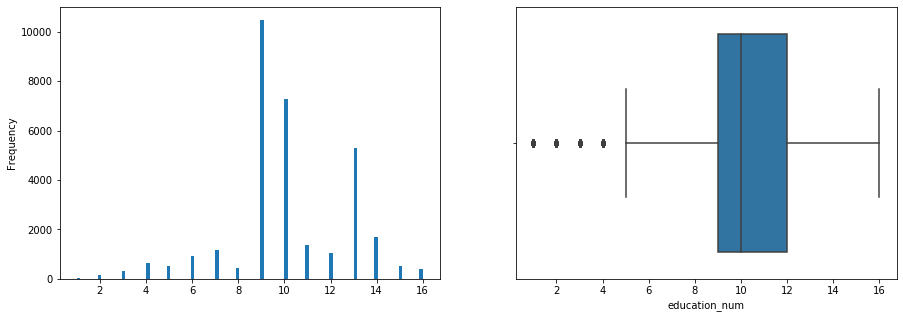

In [93]:
plotting_hist_box(df,'education_num')

### - hours per week

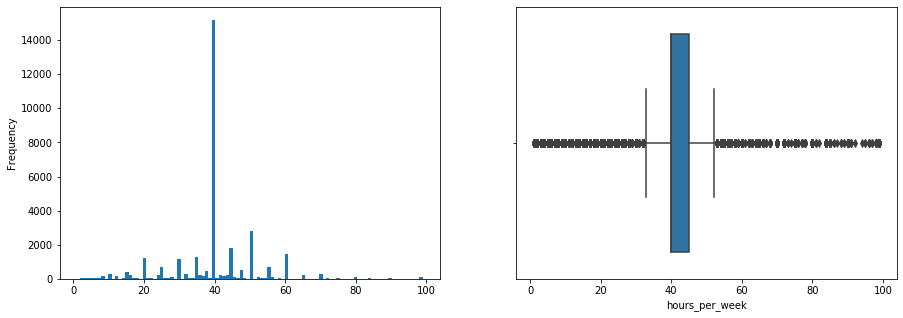

In [94]:
plotting_hist_box(df,'hours_per_week')

### - age

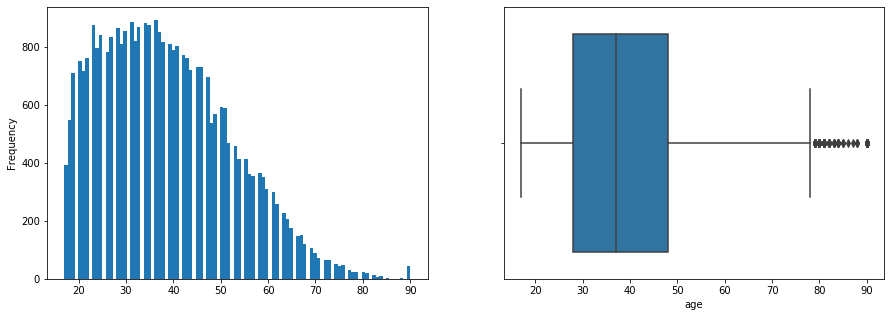

In [95]:
plotting_hist_box(df,'age')

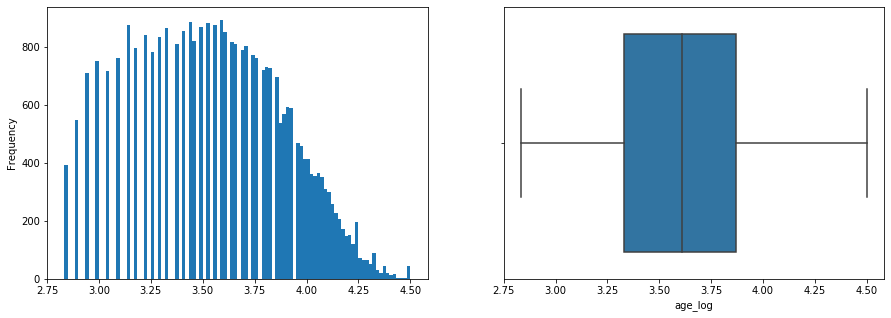

In [97]:
df['age_log']=df['age'].map(lambda x: np.log(x))
plotting_hist_box(df,'age_log')

### Normalizacja danych numerycznych ciągłych
In addition to performing transformations on features that are highly skewed, it is often good practice to perform some scaling on numerical features. Applying a scaling to the data does not change the shape of each feature's distribution (such as 'capital-gain' or 'capital-loss' above); however, normalization ensures that each feature is treated equally when applying supervised learners. Note that once scaling is applied, observing the data in its raw form will no longer have the same original meaning, as exampled below.

C:\Users\MWojtkowska\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  


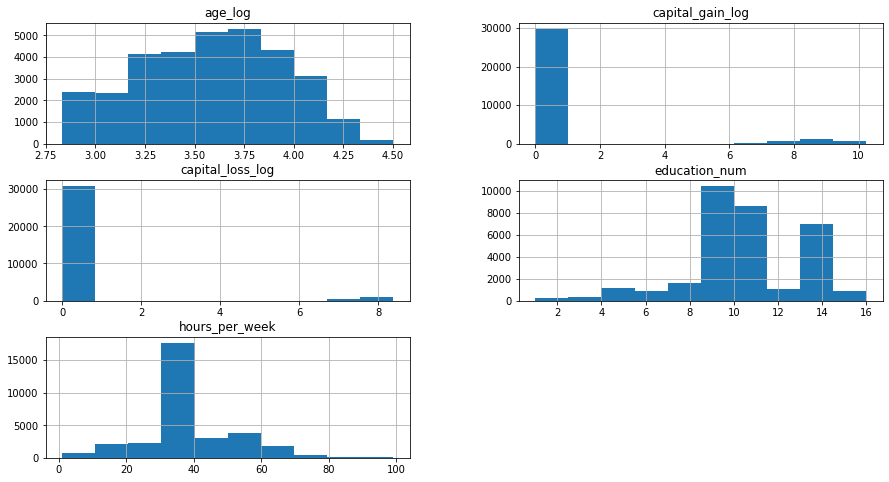

In [99]:
to_normalize = ['age_log', 'education_num', 'capital_gain_log', 'capital_loss_log', 'hours_per_week']

# plot
fig = plt.figure(figsize = (15,8))
ax = fig.gca()
df[to_normalize].hist(ax=ax)
plt.show()

In [100]:
scaler = MinMaxScaler()  # default =(0, 1)
df[to_normalize] = scaler.fit_transform(df[to_normalize])

C:\Users\MWojtkowska\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


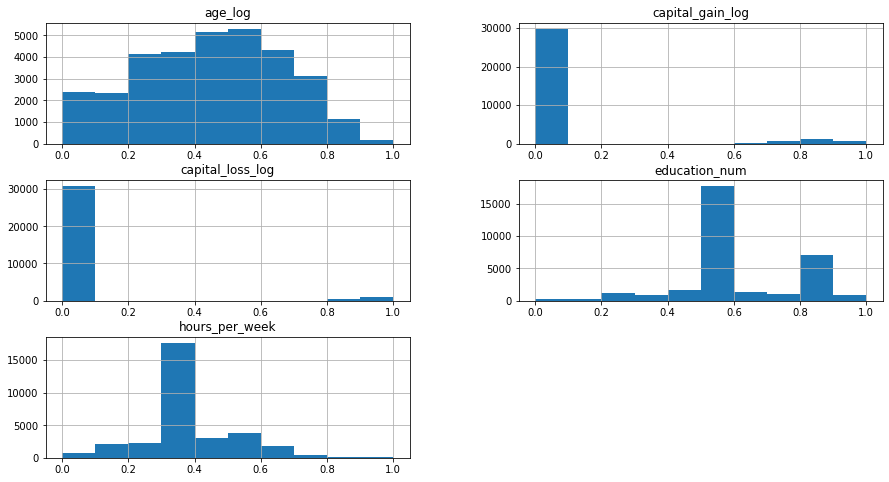

In [101]:
# plot after normalization
fig = plt.figure(figsize = (15,8))
ax = fig.gca()
df[to_normalize].hist(ax=ax)
plt.show()

In [102]:
df.head()

,age,workclass,education,education_num,marital_status,occupation,race,sex,capital_gain,capital_loss,...,marital_status_groups,marital_status_groups_cat,occupation_cat,occupation_groups,occupation_groups_cat,country_groups,country_groups_cat,capital_gain_log,capital_loss_log,age_log
0,90,-1,HS-grad,0.533333,Widowed,-1,White,Female,0,4356,...,single,0,0,-1,0,north_america,0,0.0,1.000000,1.000000
1,82,Private,HS-grad,0.533333,Widowed,Exec-managerial,White,Female,0,4356,...,single,0,1,high,1,north_america,0,0.0,1.000000,0.944143
2,66,-1,Some-college,0.600000,Widowed,-1,Black,Female,0,4356,...,single,0,0,-1,0,north_america,0,0.0,1.000000,0.813899
3,54,Private,7th-8th,0.200000,Divorced,Machine-op-inspct,White,Female,0,3900,...,single,0,2,mid_low,2,north_america,0,0.0,0.986807,0.693492
4,41,Private,Some-college,0.600000,Separated,Prof-specialty,White,Female,0,3900,...,single,0,3,high,1,north_america,0,0.0,0.986807,0.528238


### Zapis df do csv

In [103]:
df.to_csv('D:\\PYTHON_PROJ\\ADULT_INCOME\\DATA\\adult_preprocessed.csv')